In [ ]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import cv2
from tensorflow.keras import optimizers

2.8.0


In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='tanh', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='tanh', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [6]:
# Compile
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=rms, metrics=['accuracy'])


# Fit with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

batch_size = 32

training_generator = train_datagen.flow(x_train, y_train, batch_size=32,subset='training')
validation_generator = train_datagen.flow(x_train, y_train, batch_size=32,subset='validation')

steps_per_epoch = (x_train.shape[0] - 10000) // batch_size

r = model.fit(
    training_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator, 
    validation_steps = 20,
    epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
1250/1250 [==============================] - 422s 336ms/step - loss: 1.5145 - accuracy: 0.4832 - val_loss: 14.6313 - val_accuracy: 0.1031
Epoch 2/10
1250/1250 [==============================] - 421s 337ms/step - loss: 1.0777 - accuracy: 0.6251 - val_loss: 10.5103 - val_accuracy: 0.1500
Epoch 3/10
1250/1250 [==============================] - 422s 337ms/step - loss: 0.9624 - accuracy: 0.6730 - val_loss: 16.5325 - val_accuracy: 0.1547
Epoch 4/10
1250/1250 [==============================] - 421s 336ms/step - loss: 0.8833 - accuracy: 0.6994 - val_loss: 19.7503 - val_accuracy: 0.1000
Epoch 5/10
1250/1250 [==============================] - 419s 335ms/step - loss: 0.8404 - accuracy: 0.7112 - val_loss: 13.8435 - val_accuracy: 0.1328
Epoch 6/10
1250/1250 [==============================] - 427s 341ms/step - loss: 0.7568 - accuracy: 0.7427 - val_loss: 11.9249 - val_accuracy: 0.0953
Epoch 7/10
1250/1250 [==============================] - 427s 342ms/step - loss: 0.7342 - accuracy: 0.7484 

313/313 [==============================] - 34s 104ms/step - loss: 5.4663 - accuracy: 0.1985
Test accuracy: 0.19850000739097595


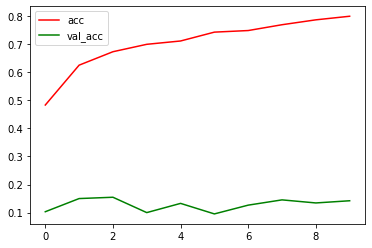

In [7]:
# Plot accuracy per iteration

score = model.evaluate(x_test, y_test)
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

print('Test accuracy:', score[1])